In [240]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns
import sklearn
plt.rcParams["figure.figsize"] = (18,9)
df = pd.read_csv('train.csv')
df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


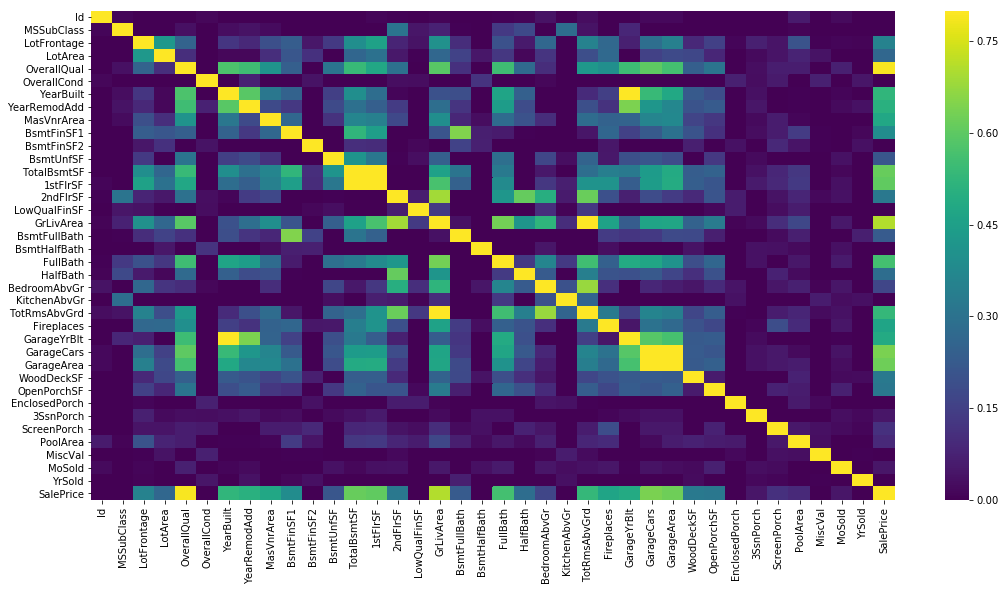

In [241]:
sns.heatmap(df.corr(),cmap='viridis', vmax=0.8, vmin=0)

In [242]:
cols = ['LotFrontage','OverallQual', 'SalePrice',u'LotArea', u'YearBuilt', u'YearRemodAdd', u'MasVnrArea', u'BsmtFinSF1', u'BsmtUnfSF', u'TotalBsmtSF', u'1stFlrSF',u'GrLivArea',u'BsmtFullBath',u'FullBath',u'HalfBath', u'BedroomAbvGr', u'TotRmsAbvGrd', u'Fireplaces',u'GarageYrBlt', u'GarageCars', u'GarageArea', u'WoodDeckSF', u'OpenPorchSF', u'ScreenPorch', u'PoolArea', u'MoSold' ,u'3SsnPorch' ]

In [243]:
df_train = df[cols]
df_train.head(3)

,LotFrontage,OverallQual,SalePrice,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,...,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,ScreenPorch,PoolArea,MoSold,3SsnPorch
0,65.0,7,208500,8450,2003,2003,196.0,706,150,856,...,0,2003.0,2,548,0,61,0,0,2,0
1,80.0,6,181500,9600,1976,1976,0.0,978,284,1262,...,1,1976.0,2,460,298,0,0,0,5,0
2,68.0,7,223500,11250,2001,2002,162.0,486,434,920,...,1,2001.0,2,608,0,42,0,0,9,0


In [244]:
df_train['MasVnrArea'].fillna(value=0 , inplace=True)
df_train['LotFrontage'].fillna(value=0 , inplace=True)

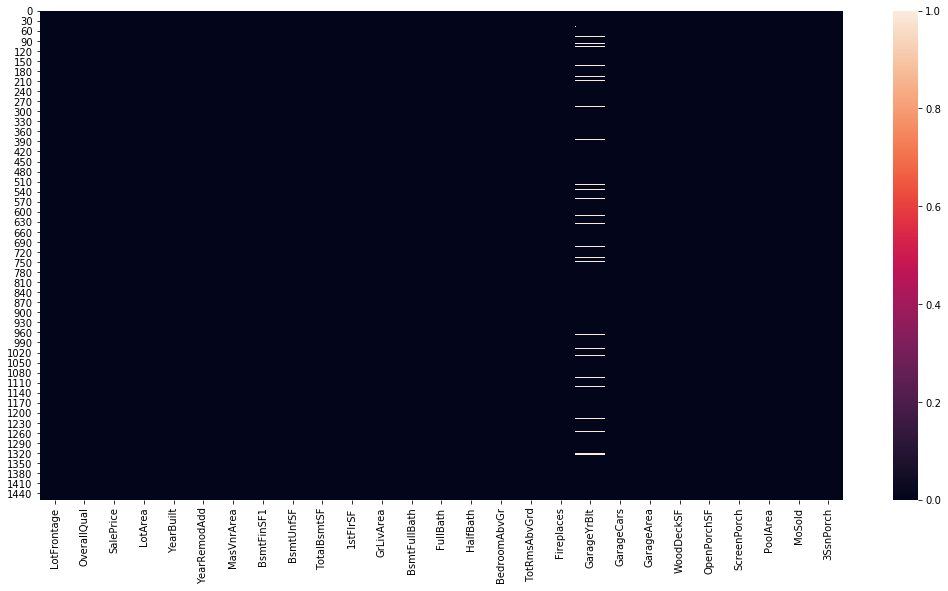

In [245]:
sns.heatmap(df_train.isnull())

In [246]:
df_train['GarageYrBlt'].mean()

1978.5061638868744

In [247]:
df_train['GarageYrBlt'].fillna(value=1979 , inplace=True)

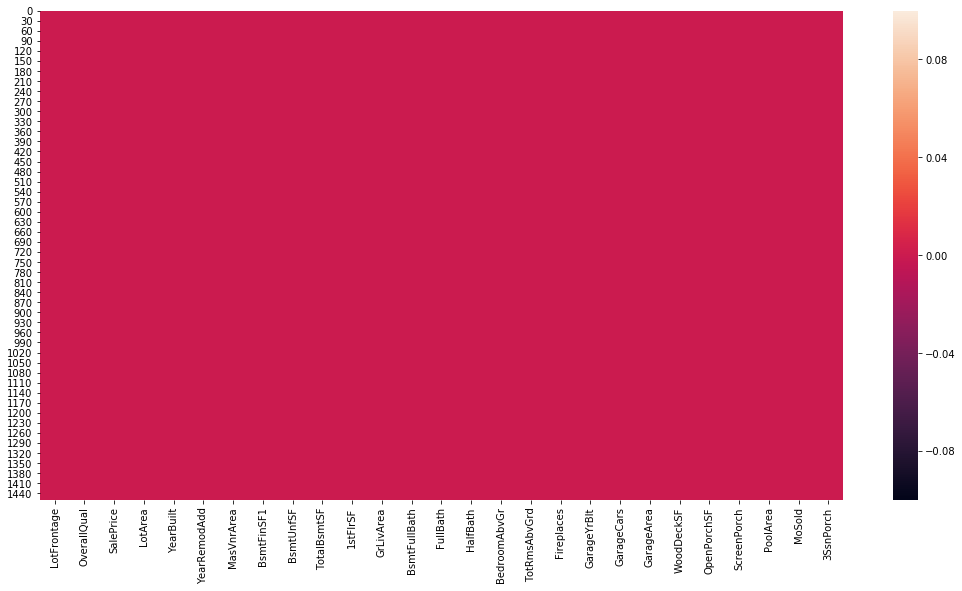

In [248]:
sns.heatmap(df_train.isnull())

In [329]:
from sklearn.ensemble import ExtraTreesRegressor,RandomForestRegressor,GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

In [250]:
X= df_train.drop('SalePrice' ,axis=1)
y= df_train['SalePrice']

In [251]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

In [252]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [334]:
rfr = RandomForestRegressor(n_estimators=300, max_depth=14,max_features= "log2")
rfr.fit(X_train,y_train)

ext = ExtraTreesRegressor(n_estimators=300, max_depth=14, max_features= "log2")
ext.fit(X_train,y_train)

dtr = DecisionTreeRegressor(max_depth=14, max_features= "log2")
dtr.fit(X_train,y_train)

print "Random Forest Model"
print "Train Score {}".format(rfr.score(X_train,y_train))
print "Test Score {}".format(rfr.score(X_test,y_test))
print "\n"
print "ExtraTreesRegressor Model"
print "Train Score {}".format(ext.score(X_train,y_train))
print "Test Score {}".format(ext.score(X_test,y_test))
print "\n"
print "DecisonTree Model"
print "Train Score {}".format(dtr.score(X_train,y_train))
print "Test Score {}".format(dtr.score(X_test,y_test))

Random Forest Model
Train Score 0.976990220775
Test Score 0.856271315539


ExtraTreesRegressor Model
Train Score 0.994144361928
Test Score 0.852252351991


DecisonTree Model
Train Score 0.996066424463
Test Score 0.721787763693


In [325]:
X_train.shape

(978, 26)